In [35]:
%reload_ext autoreload
%autoreload
%matplotlib inline

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
from ewstools import ewstools

In [38]:
from pathlib import Path
Path

pathlib.Path

In [39]:
df = pd.read_csv('sp1.csv')
df.head(20)

,Date,Open,High,Low,Close,Adj Close,Volume,Log,9-MA,Smoothed
0,1,2072.290039,2072.290039,2045.660034,2045.969971,2045.969971,4016370000,3.310899,3.31359,-0.00269
1,2,2044.640015,2044.640015,2022.020020,2023.040039,2023.040039,4278750000,3.306004,3.31426,-0.00825
2,3,2022.079956,2053.219971,2019.390015,2053.189941,2053.189941,3741240000,3.312429,3.31632,-0.00389
3,4,2053.669922,2066.689941,2045.900024,2050.439941,2050.439941,4427350000,3.311847,3.31729,-0.00545
4,5,2051.989990,2085.310059,2051.989990,2083.580078,2083.580078,3926390000,3.318810,3.31865,0.00016
5,6,2083.699951,2086.739990,2078.760010,2081.239990,2081.239990,3628110000,3.318322,3.31861,-0.00029
6,7,2082.820068,2097.060059,2082.820068,2089.169922,2089.169922,3929600000,3.319974,3.31869,0.00129
7,8,2089.409912,2095.610107,2081.389893,2086.590088,2086.590088,3587980000,3.319437,3.31837,0.00107
8,9,2084.419922,2094.120117,2070.290039,2089.139893,2089.139893,3884930000,3.319968,3.31810,0.00187
9,10,2089.300049,2093.000000,2086.300049,2088.870117,2088.870117,2852940000,3.319911,3.31763,0.00228


In [40]:
df.set_index('Date');

In [41]:
df_traj = pd.DataFrame(df)
df_traj.set_index('Date', inplace=True)

In [42]:
rw = 0.5 # rolling window
span = 0.5 # Lowess span
lags = [1,2,3] # autocorrelation lag times to compute
ews = ['var','sd','ac','skew','kurt','ac','smax','cf','aic'] # EWS to compute (let's do all of them)
ham_length = 80 # number of data points in Hamming window
ham_offset = 0.5 # proportion of Hamming window to offset by upon each iteration
pspec_roll_offset = 20 # offset for rolling window when doing spectrum metrics

In [43]:
ewstools.ews_compute

<function ewstools.ewstools.ews_compute(raw_series, roll_window=0.4, smooth='Lowess', span=0.1, band_width=0.2, upto='Full', ews=['var', 'ac'], lag_times=[1], ham_length=40, ham_offset=0.5, pspec_roll_offset=20, w_cutoff=1, sweep=False)>

In [44]:
df.shape

(999, 9)

In [45]:
ews_dic = ewstools.ews_compute(df_traj['Close'], 
                          roll_window = rw, 
                          span = span,
                          lag_times = lags, 
                          ews = ews,
                          upto=991)

In [46]:
#The DataFrame of EWS
df_ews = ews_dic['EWS metrics']

#The DataFrame of power spectra
df_pspec = ews_dic['Power spectrum']

#The DataFrame of ktau values
df_ktau = ews_dic['Kendall tau']

In [47]:
df_ktau

,Smax,Lag-1 AC,Variance,Smax/Var,Lag-3 AC,Lag-2 AC,Standard deviation,Kurtosis
0,0.92,0.468016,0.94459,-0.233333,0.431026,0.426524,0.94459,-0.227214


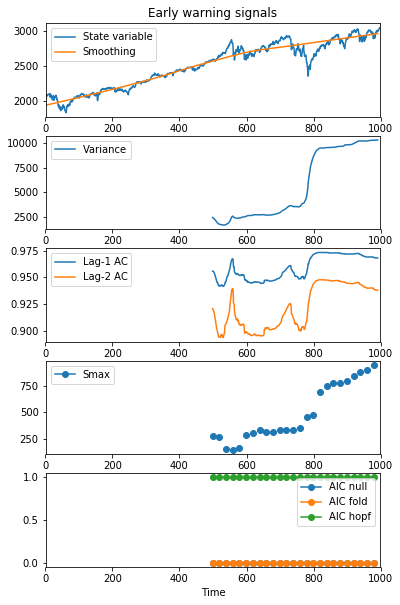

In [48]:
## Plot of trajectory, smoothing and EWS of var (x or y)
fig1, axes = plt.subplots(nrows=5, ncols=1, figsize=(6,10))
df_ews[['State variable','Smoothing']].plot(ax=axes[0],
          title='Early warning signals')
df_ews['Variance'].plot(ax=axes[1],legend=True)
df_ews[['Lag-1 AC','Lag-2 AC']].plot(ax=axes[2],legend=True)
df_ews['Smax'].plot(ax=axes[3],legend=True, marker='o')
df_ews[['AIC null','AIC fold','AIC hopf']].plot(ax=axes[4],legend=True, marker='o')